In [3]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Luminar\\Desktop\\mljourney\\pandasworks\\customer_behaviour_case_study\\E-commerce Customer Behavior - Sheet1.csv")

In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='str')

In [5]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [6]:
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Membership Type":"membership_type","Total Spend":"total_spend","Items Purchased":"items_purchased","Average Rating":"average_rating","Discount Applied":"discount_applied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfaction_level"},inplace=True)

In [8]:
df.columns

Index(['customer_id', 'gender', 'Age', 'City', 'membership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='str')

In [9]:
df["satisfaction_level"]=df["average_rating"].apply(lambda x : "unsatisfied" if x<=4.0 else "neutral" if x>4.0 and x<4.5 else "satisfied")

In [10]:
df.isnull().sum()

customer_id                 0
gender                      0
Age                         0
City                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          0
dtype: int64

In [11]:
df.isnull().sum()

customer_id                 0
gender                      0
Age                         0
City                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          0
dtype: int64

In [12]:
df.head()

,customer_id,gender,Age,City,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,unsatisfied


In [13]:
df.columns

Index(['customer_id', 'gender', 'Age', 'City', 'membership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='str')

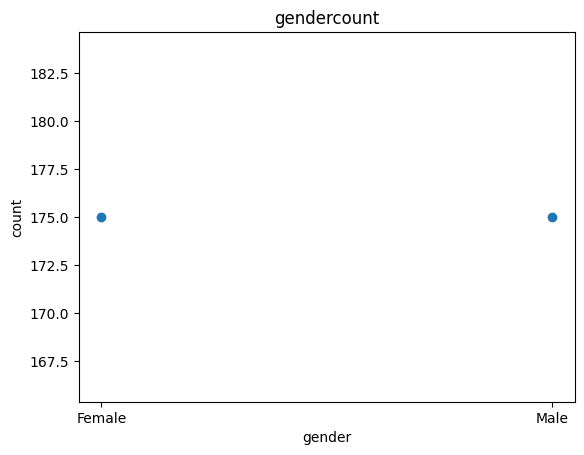

In [14]:
gender_count=df["gender"].value_counts()
import matplotlib.pyplot as plt
plt.plot(gender_count,marker="o",linestyle="none")
plt.title("gendercount")
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

In [15]:
#customer average age
df["Age"].mean().astype("int")

np.int64(33)

In [16]:
#unique membership
df["membership_type"].unique()

<StringArray>
['Gold', 'Silver', 'Bronze']
Length: 3, dtype: str

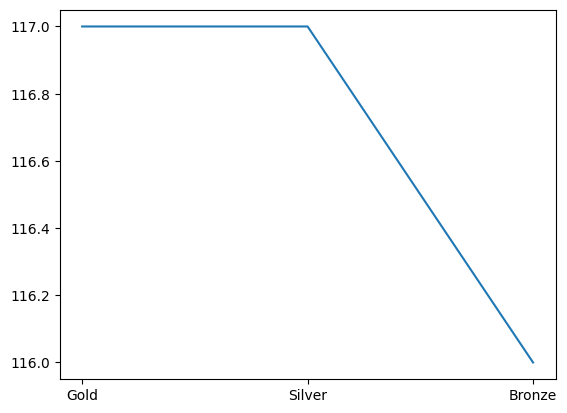

In [17]:
# membersip-wise count
ms_count= df["membership_type"].value_counts()

plt.plot(ms_count)
plt.show()

In [18]:
#membership wise total_spend sum

ms_total_spend=df.groupby("membership_type")["total_spend"].sum()
ms_total_spend

membership_type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64

<BarContainer object of 3 artists>

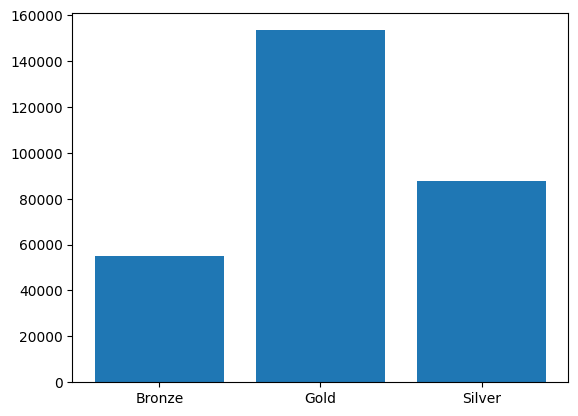

In [19]:
plt.bar(ms_total_spend.index,ms_total_spend.values)

In [20]:
#gold members
#rating above 4.5


In [21]:
cusomer_count_per_city = df["City"].value_counts()
cusomer_count_per_city

City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2cc40935d30>,
 [Text(1.0482892953801437, 0.3333009948851073, 'Chicago'),
  Text(0.6915931686830732, 0.8553939963729618, 'Houston'),
  Text(-0.10970201354560376, 1.094516088609044, 'Los Angeles'),
  Text(-0.9428293511093423, 0.5666328746964271, 'Miami'),
  Text(-0.8991876248554197, -0.633609986748054, 'New York'),
  Text(0.684663489670123, -0.860950582735577, 'San Francisco')])

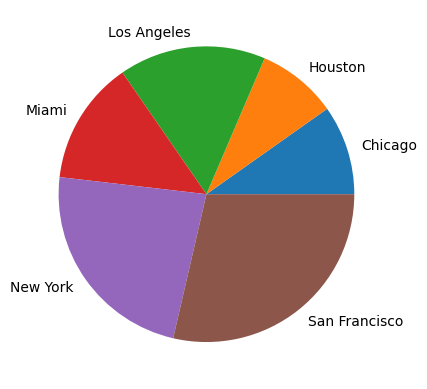

In [22]:
# City-wise total spend [plot]

city_wise_total_spend=df.groupby("City")["total_spend"].sum()

city_wise_total_spend

plt.pie(city_wise_total_spend.values,labels=city_wise_total_spend.index)

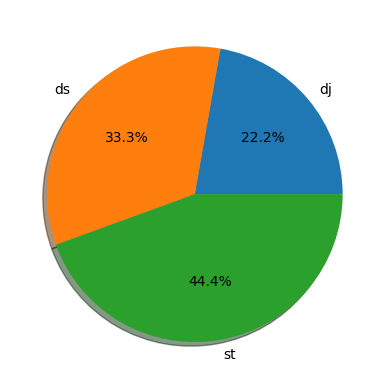

In [23]:

batches=["dj","ds","st"]

head_count= [20,30,40]

plt.pie(head_count,labels=batches,autopct="%1.1f%%",shadow=True)
plt.show()

In [24]:
df.columns

Index(['customer_id', 'gender', 'Age', 'City', 'membership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='str')

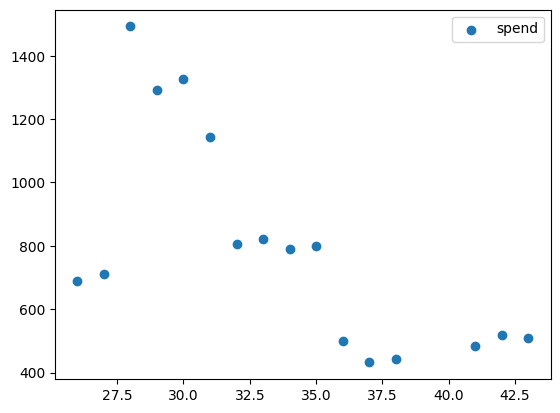

In [29]:
age_total_pend=df.groupby("Age")["total_spend"].mean()

age_total_pend

plt.scatter(age_total_pend.index,age_total_pend.values,label="spend")
plt.legend()

(array([3., 4., 5.]),
 array([150.        , 157.66666667, 165.33333333, 173.        ]),
 <BarContainer object of 3 artists>)

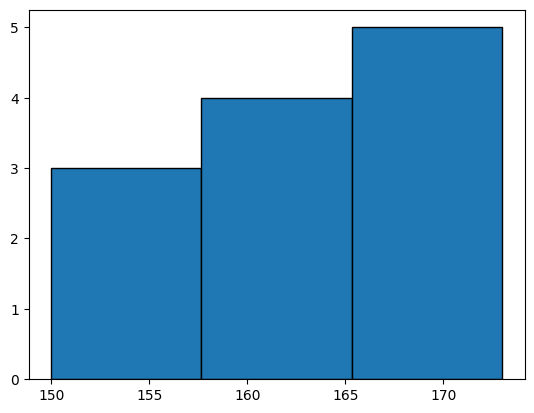

In [35]:
#visulize age distribution [dominant customer age group] => histogram
height=[163,173,173,162,170,172,170,163,150,162,157,154]
plt.hist(height,bins=3,edgecolor="black")

(array([ 69., 106.,  84.,  33.,  58.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. ]),
 <BarContainer object of 5 artists>)

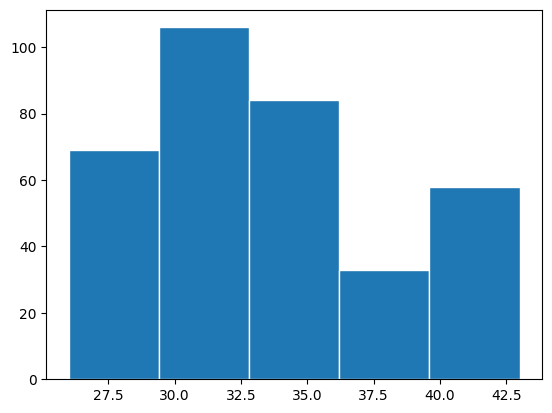

In [37]:
plt.hist(df["Age"],bins=5,edgecolor="white")

In [38]:
#box plot , subplot

In [ ]:
# Numeric vs numeric | scatter
#distribution        | histogram
#trend               |  line
#categroy vs number  |  bar
#comparison          | boxplot
#seaborn